# PHASE_5_CAPSTONE_PROJECT

# MODELING

### Data source:

The data source consists of over 44 thousand fashion images from Kaggle.

Source link: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-dataset

### Target:

Leverage a dataset comprising more than 24k images across 10 distinct fashion product types, including t-shirts, shirts, casual shoes, watches, sports shoes, kurtas, handbags, heels, sunglasses, and wallets, for image labeling in customer search.

In [44]:
# !pip install hdf5storage


In [45]:
import pandas as pd
import numpy as np
import csv
import json
import glob
import os
import shutil
import random
import pickle
import h5py
import hdf5storage
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from IPython.display import display
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras import layers
from keras.models import Sequential
from keras.layers import Reshape
from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array
from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import L2
from tensorflow.keras.layers import Dropout



from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# a new layer that rescales/normalizes the activations after each layer.
# has a weak regularization effect. also allows 

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras import layers, regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from keras.models import load_model

%matplotlib inline


In [2]:
attributes = pd.read_csv('/Users/thaophan/Documents/Flatiron/Phase5_Project/product_attributes.csv')
attributes

,Unnamed: 0,id,brand,gender,year,season,color,usage,division,productgroup,producttype,variantname,productdisplayname
0,0,57896,Femella,Women,2012.0,Summer,Off White,Casual,Apparel,Bottomwear,Shorts,Summer Pleated Short,Femella Women Off White Shorts
1,1,37297,CASIO,Men,2016.0,Winter,Black,Casual,Accessories,Watches,Watches,CASIO,Casio Enticer Men Black Analogue Watches (A504...
2,2,3721,Lee,Men,2011.0,Summer,Black,Casual,Accessories,Belts,Belts,Lee mens black canvas belt,Lee Men Black Canvas Belt
3,3,51041,Enamor,Women,2017.0,Summer,White,Casual,Apparel,Innerwear,Briefs,DRESSUP02,Enamor Women Ivory Coloured Briefs
4,4,2833,Lee Cooper,Men,2012.0,Summer,Black,Casual,Footwear,Shoes,Casual Shoes,Lee cooper black Casual Leather shoes Darknight,Lee Cooper Men's Casual Leather Darknight Blac...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44441,44441,35401,Stens by Enroute,Men,2012.0,Summer,Brown,Casual,Footwear,Shoes,Casual Shoes,Casual Shoe,Stens by Enroute Men Brown Shoes
44442,44442,48131,Fossil,Women,2012.0,Summer,Pink,Casual,Accessories,Bags,Handbags,CONVERTIBLE MINI BERRY,Fossil Women Pink Bags
44443,44443,7960,Puma,Men,2011.0,Fall,Green,Sports,Apparel,Topwear,Tshirts,Large Logo Graphic Tee,Puma Men's Large Logo Graphic Green T-shirt
44444,44444,54112,Rocia,Women,2012.0,Winter,Black,Casual,Footwear,Shoes,Flats,ROCIA BEIGE Sandal,Rocia Women Black Flats


In [4]:
producttype_counts = attributes.producttype.value_counts()
producttype_counts_df = producttype_counts.reset_index()
producttype_counts_df.columns = ['producttype', 'count']
producttype_counts_df

,producttype,count
0,Tshirts,7070
1,Shirts,3217
2,Casual Shoes,2846
3,Watches,2542
4,Sports Shoes,2036
...,...,...
138,Ipad,1
139,Suits,1
140,Mens Grooming Kit,1
141,Shoe Laces,1


In [5]:
producttype_counts_df[producttype_counts_df['count'] >=930]

,producttype,count
0,Tshirts,7070
1,Shirts,3217
2,Casual Shoes,2846
3,Watches,2542
4,Sports Shoes,2036
5,Kurtas,1844
6,Tops,1762
7,Handbags,1759
8,Heels,1323
9,Sunglasses,1073


In [6]:
class_list = producttype_counts_df[producttype_counts_df['count'] >=930].drop(index=6)

In [7]:
class_df = attributes[attributes['producttype'].isin(list(class_list.producttype.unique()))][['id','producttype']]
class_df

,id,producttype
1,37297,Watches
4,2833,Casual Shoes
5,29289,Shirts
6,49888,Watches
7,23684,Wallets
...,...,...
44440,19094,Kurtas
44441,35401,Casual Shoes
44442,48131,Handbags
44443,7960,Tshirts


In [8]:
class_df.loc[:,'image_id'] = class_df['id'].astype(str) + ".jpg"
class_df

,id,producttype,image_id
1,37297,Watches,37297.jpg
4,2833,Casual Shoes,2833.jpg
5,29289,Shirts,29289.jpg
6,49888,Watches,49888.jpg
7,23684,Wallets,23684.jpg
...,...,...,...
44440,19094,Kurtas,19094.jpg
44441,35401,Casual Shoes,35401.jpg
44442,48131,Handbags,48131.jpg
44443,7960,Tshirts,7960.jpg


In [9]:
class_0_tshirt_list = list(class_df[(class_df['producttype']=="Tshirts")]['image_id'])
class_1_shirt_list = list(class_df[(class_df['producttype']=="Shirts")]['image_id'])
class_2_casualshoes_list = list(class_df[(class_df['producttype']=="Casual Shoes")]['image_id'])
class_3_watches_list = list(class_df[(class_df['producttype']=="Watches")]['image_id'])
class_4_sportsshoes_list = list(class_df[(class_df['producttype']=="Sports Shoes")]['image_id'])
class_5_kurtas_list = list(class_df[(class_df['producttype']=="Kurtas")]['image_id'])
class_6_handbags_list = list(class_df[(class_df['producttype']=="Handbags")]['image_id'])
class_7_heels_list = list(class_df[(class_df['producttype']=="Heels")]['image_id'])
class_8_sunglasses_list = list(class_df[(class_df['producttype']=="Sunglasses")]['image_id'])
class_9_wallets_list = list(class_df[(class_df['producttype']=="Wallets")]['image_id'])

In [10]:
class_list_all = [class_0_tshirt_list,class_1_shirt_list,class_2_casualshoes_list,class_3_watches_list,class_4_sportsshoes_list,class_5_kurtas_list,class_6_handbags_list,class_7_heels_list,class_8_sunglasses_list,class_9_wallets_list]

In [11]:
class_folder_all =['/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_0',
                  '/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_1',
                  '/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_2',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_3',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_4',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_5',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_6',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_7',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_8',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_9',
]

In [20]:
# Directory path
train_data_dir_sample = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Train_Test_Validation/Train'
val_data_dir_sample = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Train_Test_Validation/Test'
test_data_dir_sample = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Train_Test_Validation/Validation'

image_size = (256, 256)
num_classes = 10

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False)
 
val_datagen = ImageDataGenerator(rescale = 1/255) # Only rescale for the val set

test_datagen = ImageDataGenerator(rescale = 1/255) # Only rescale for the test set


train_generator = train_datagen.flow_from_directory(directory=train_data_dir_sample, target_size = image_size,
                                                   class_mode='categorical',
                                                    batch_size=64,
                                                    shuffle=True,
                                                    classes=[str(i) for i in range(num_classes)])

val_generator = val_datagen.flow_from_directory(directory=val_data_dir_sample, target_size = image_size,
                                                   class_mode='categorical',
                                                    batch_size=64,
                                                shuffle=True,
                                                  classes=[str(i) for i in range(num_classes)])

test_generator = test_datagen.flow_from_directory(directory=test_data_dir_sample, target_size = image_size,
                                                    class_mode='categorical',
                                                   batch_size=64,
                                                  shuffle=False,
                                                  classes=[str(i) for i in range(num_classes)])

Found 14782 images belonging to 10 classes.
Found 4926 images belonging to 10 classes.
Found 4935 images belonging to 10 classes.


### 1st CNN model

In [21]:
cnn_model = Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))


In [22]:
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy','AUC','Precision','Recall'])

In [23]:
history_cnn1 = cnn_model.fit(train_generator,
                        steps_per_epoch=len(train_generator),
                        epochs=50,
                        validation_data=val_generator,
                        validation_steps=len(val_generator))


Epoch 1/50
231/231 [==============================] - 2260s 10s/step - loss: 1.5640 - accuracy: 0.4297 - auc: 0.8543 - precision: 0.6699 - recall: 0.2176 - val_loss: 0.8337 - val_accuracy: 0.7081 - val_auc: 0.9602 - val_precision: 0.7766 - val_recall: 0.6153
Epoch 2/50
231/231 [==============================] - 340s 1s/step - loss: 0.8954 - accuracy: 0.6664 - auc: 0.9550 - precision: 0.7695 - recall: 0.5523 - val_loss: 0.4999 - val_accuracy: 0.8313 - val_auc: 0.9851 - val_precision: 0.8742 - val_recall: 0.7649
Epoch 3/50
231/231 [==============================] - 336s 1s/step - loss: 0.6198 - accuracy: 0.7761 - auc: 0.9772 - precision: 0.8277 - recall: 0.7155 - val_loss: 0.4272 - val_accuracy: 0.8305 - val_auc: 0.9885 - val_precision: 0.8548 - val_recall: 0.7994
Epoch 4/50
231/231 [==============================] - 336s 1s/step - loss: 0.5206 - accuracy: 0.8085 - auc: 0.9835 - precision: 0.8463 - recall: 0.7660 - val_loss: 0.3636 - val_accuracy: 0.8553 - val_auc: 0.9918 - val_precision

Epoch 33/50
231/231 [==============================] - 346s 1s/step - loss: 0.1858 - accuracy: 0.9307 - auc: 0.9972 - precision: 0.9369 - recall: 0.9256 - val_loss: 0.1908 - val_accuracy: 0.9383 - val_auc: 0.9964 - val_precision: 0.9408 - val_recall: 0.9359
Epoch 34/50
231/231 [==============================] - 349s 2s/step - loss: 0.1820 - accuracy: 0.9327 - auc: 0.9972 - precision: 0.9377 - recall: 0.9273 - val_loss: 0.1841 - val_accuracy: 0.9379 - val_auc: 0.9963 - val_precision: 0.9412 - val_recall: 0.9363
Epoch 35/50
231/231 [==============================] - 347s 1s/step - loss: 0.1816 - accuracy: 0.9345 - auc: 0.9971 - precision: 0.9396 - recall: 0.9286 - val_loss: 0.1869 - val_accuracy: 0.9320 - val_auc: 0.9967 - val_precision: 0.9356 - val_recall: 0.9285
Epoch 36/50
231/231 [==============================] - 341s 1s/step - loss: 0.1763 - accuracy: 0.9361 - auc: 0.9972 - precision: 0.9409 - recall: 0.9317 - val_loss: 0.1610 - val_accuracy: 0.9425 - val_auc: 0.9971 - val_precisi

#### Save model

In [25]:
cnn_model.save('cnn_model_50epoch.h5')

In [46]:
hdf5storage.savemat("history_cnn1_50epoch.h5", history_cnn1.history)

#### Evaluate the model

In [30]:
cnn_model_loaded = load_model('cnn_model_50epoch.h5')

In [31]:
cnn_model_loaded.evaluate(train_generator)

231/231 [==============================] - 112s 484ms/step - loss: 0.1681 - accuracy: 0.9376 - auc: 0.9972 - precision: 0.9418 - recall: 0.9338


[0.1681109368801117,
 0.937626838684082,
 0.997184693813324,
 0.9417985677719116,
 0.9337707757949829]

In [32]:
cnn_model_loaded.evaluate(test_generator)

78/78 [==============================] - 30s 380ms/step - loss: 0.1844 - accuracy: 0.9392 - auc: 0.9960 - precision: 0.9421 - recall: 0.9366


[0.18441927433013916,
 0.9392096996307373,
 0.9960055351257324,
 0.9421116709709167,
 0.9365754723548889]

In [48]:
loaded_cnn_history = hdf5storage.loadmat("history_cnn1_50epoch.h5")

In [50]:
print(loaded_cnn_history.keys())

dict_keys(['accuracy', 'auc', 'loss', 'precision', 'recall', 'val_accuracy', 'val_auc', 'val_loss', 'val_precision', 'val_recall'])


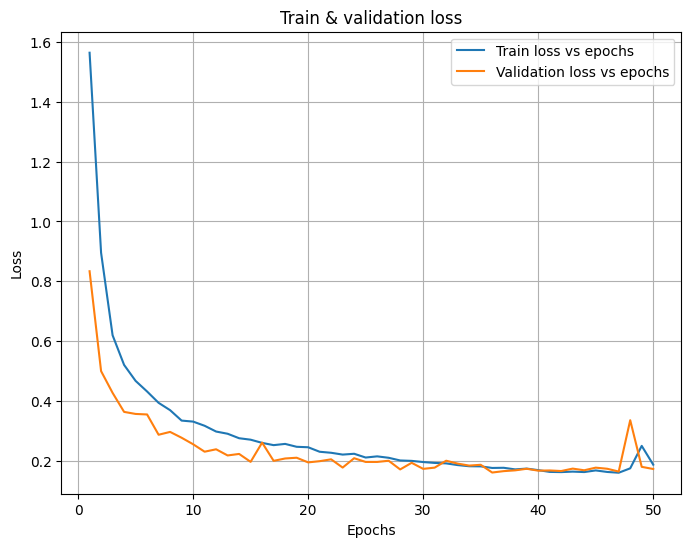

In [56]:
fig,ax=plt.subplots(figsize=(8,6))

cnn1_loss_values = loaded_cnn_history['loss']
cnn1_val_loss_values = loaded_cnn_history['val_loss']


epochs = range(1,len(cnn1_loss_values)+1)

ax.plot(epochs,cnn1_loss_values,label='Train loss vs epochs')
ax.plot(epochs,cnn1_val_loss_values,label='Validation loss vs epochs')

ax.set_title('Train & validation loss')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('Loss');

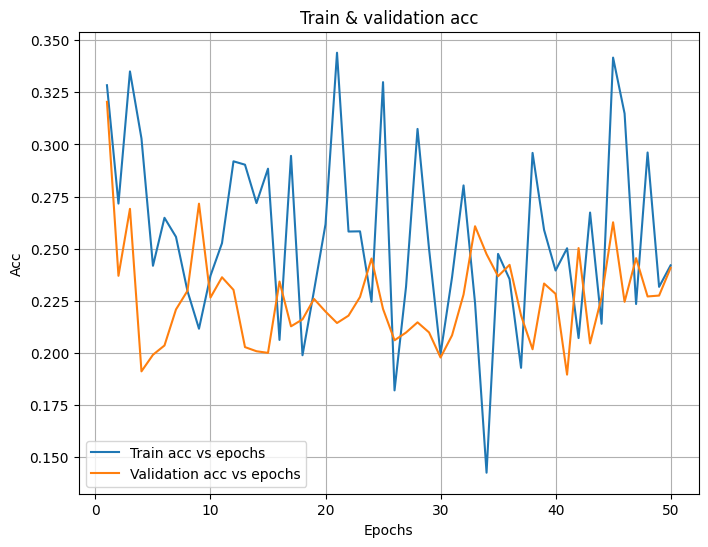

In [186]:
fig,ax=plt.subplots(figsize=(8,6))

cnn1_acc_values = history_cnn1.history['accuracy']
cnn1_val_acc_values = history_cnn1.history['val_accuracy']


epochs = range(1,len(cnn1_acc_values)+1)

ax.plot(epochs,cnn1_loss_values,label='Train acc vs epochs')
ax.plot(epochs,cnn1_val_loss_values,label='Validation acc vs epochs')

ax.set_title('Train & validation acc')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('Acc');

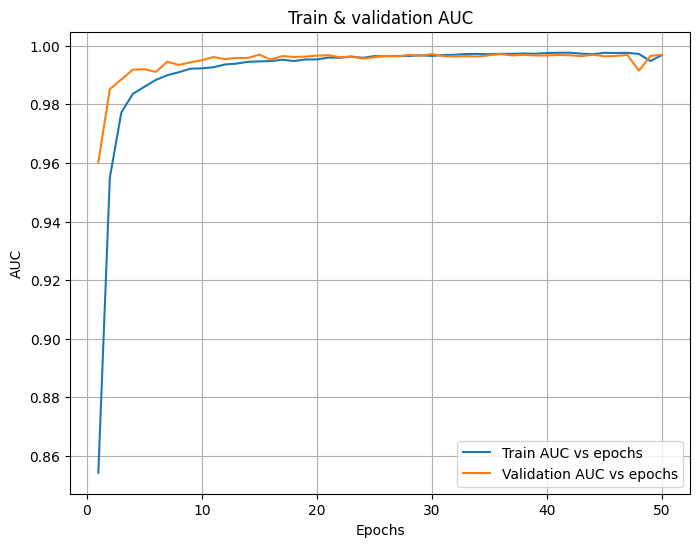

In [53]:
fig,ax=plt.subplots(figsize=(8,6))

cnn1_AUC_values = loaded_cnn_history['auc']
cnn1_val_AUC_values = loaded_cnn_history['val_auc']


epochs = range(1,len(cnn1_loss_values)+1)

ax.plot(epochs,cnn1_AUC_values,label='Train AUC vs epochs')
ax.plot(epochs,cnn1_val_AUC_values,label='Validation AUC vs epochs')

ax.set_title('Train & validation AUC')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('AUC');

In [57]:
cnn1_test_class_pred = cnn_model_loaded.predict(test_generator,steps=len(test_generator))

78/78 [==============================] - 29s 372ms/step


In [58]:
cnn1_predicted_classes = np.argmax(cnn1_test_class_pred, axis=-1)
cnn1_predicted_classes

array([0, 0, 0, ..., 9, 9, 0])

In [59]:
cnn1_true_classes = test_generator.classes
cnn1_true_classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [60]:
cnn1_class_labels = list(test_generator.class_indices.keys()) 
cnn1_class_labels

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [62]:
cnn1_class_labels_mapping = {0: 'Tshirts', 1: 'Shirts', 2: 'casual_shoes',3: 'watches' , 4: 'sports_shoes', 5: 'kurtas',6:'handbags',7:'heels',8:'sunglasses',9:'wallets'}
cnn1_class_labels_words = list(cnn1_class_labels_mapping.values())
cnn1_class_labels_words

['Tshirts',
 'Shirts',
 'casual_shoes',
 'watches',
 'sports_shoes',
 'kurtas',
 'handbags',
 'heels',
 'sunglasses',
 'wallets']

In [64]:
cnn1_cm_digits = confusion_matrix(cnn1_true_classes, cnn1_predicted_classes)
cnn1_cm_digits

array([[1392,   13,    0,    5,    0,    2,    1,    0,    0,    0],
       [  29,  612,    0,    1,    0,    2,    0,    0,    0,    0],
       [   0,    0,  448,    0,  119,    0,    0,    3,    0,    0],
       [   1,    0,    0,  507,    0,    1,    1,    0,    0,    0],
       [   0,    0,   37,    1,  369,    0,    0,    1,    0,    0],
       [   2,    7,    0,    2,    0,  358,    0,    0,    0,    0],
       [   4,    3,    3,    4,    0,    1,  333,    1,    0,    3],
       [   2,    0,   19,    1,    7,    0,    1,  235,    0,    0],
       [   2,    0,    0,    0,    1,    0,    1,    2,  209,    1],
       [   1,    2,    1,    1,    3,    0,    8,    0,    0,  172]])

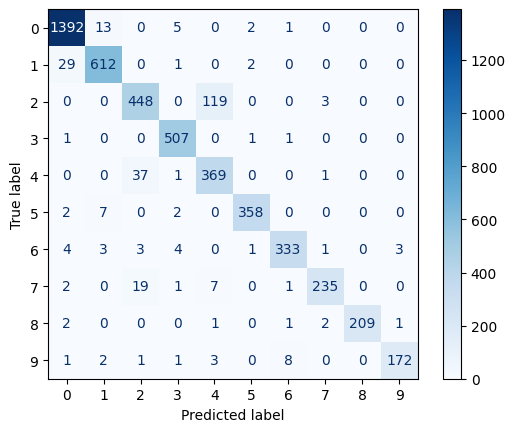

In [65]:
cnn1_disp = ConfusionMatrixDisplay(
    confusion_matrix=cnn1_cm_digits)

cnn1_disp.plot(cmap=plt.cm.Blues)
plt.show()

In [66]:
cnn1_report = classification_report(cnn1_true_classes, cnn1_predicted_classes, target_names=cnn1_class_labels_words)
print(cnn1_report)

              precision    recall  f1-score   support

     Tshirts       0.97      0.99      0.98      1413
      Shirts       0.96      0.95      0.96       644
casual_shoes       0.88      0.79      0.83       570
     watches       0.97      0.99      0.98       510
sports_shoes       0.74      0.90      0.81       408
      kurtas       0.98      0.97      0.98       369
    handbags       0.97      0.95      0.96       352
       heels       0.97      0.89      0.93       265
  sunglasses       1.00      0.97      0.98       216
     wallets       0.98      0.91      0.95       188

    accuracy                           0.94      4935
   macro avg       0.94      0.93      0.93      4935
weighted avg       0.94      0.94      0.94      4935



### 2nd CNN model- L2 Regularizer

In [85]:


cnn_model_l2 = Sequential()
cnn_model_l2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer = l2(0.0005)))
cnn_model_l2.add(MaxPooling2D(2, 2))

# Corrected Conv2D layer with kernel_regularizer parameter
cnn_model_l2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(0.0005)))
cnn_model_l2.add(MaxPooling2D(2, 2))

# Corrected Conv2D layer with kernel_regularizer parameter
cnn_model_l2.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer = l2(0.0005)))
cnn_model_l2.add(MaxPooling2D(2, 2))

# Corrected Conv2D layer with kernel_regularizer parameter
cnn_model_l2.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer = l2(0.0005)))
cnn_model_l2.add(MaxPooling2D(2, 2))

cnn_model_l2.add(Flatten())
cnn_model_l2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0005)))
cnn_model_l2.add(Dense(num_classes, activation='softmax', kernel_regularizer = l2(0.0005)))


In [86]:
cnn_model_l2.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy','AUC','Precision','Recall'])

In [87]:
history_l2 = cnn_model_l2.fit(train_generator,
                        steps_per_epoch=len(train_generator),
                        epochs=50,
                        validation_data=val_generator,
                        validation_steps=len(val_generator))

Epoch 1/10
231/231 [==============================] - 378s 2s/step - loss: 2.3859 - accuracy: 0.3797 - val_loss: 1.6377 - val_accuracy: 0.5114
Epoch 2/10
231/231 [==============================] - 369s 2s/step - loss: 1.6431 - accuracy: 0.5323 - val_loss: 1.3074 - val_accuracy: 0.6393
Epoch 3/10
231/231 [==============================] - 3060s 13s/step - loss: 1.4230 - accuracy: 0.6055 - val_loss: 1.1349 - val_accuracy: 0.7140
Epoch 4/10
231/231 [==============================] - 368s 2s/step - loss: 1.2609 - accuracy: 0.6557 - val_loss: 1.0157 - val_accuracy: 0.7393
Epoch 5/10
231/231 [==============================] - 372s 2s/step - loss: 1.2307 - accuracy: 0.6697 - val_loss: 1.0633 - val_accuracy: 0.7091
Epoch 6/10
231/231 [==============================] - 373s 2s/step - loss: 1.1556 - accuracy: 0.6894 - val_loss: 1.1657 - val_accuracy: 0.6827
Epoch 7/10
231/231 [==============================] - 378s 2s/step - loss: 1.1375 - accuracy: 0.6855 - val_loss: 0.8532 - val_accuracy: 0.79

### 3th CNN model- L2 Regularizer + Dropout

In [95]:
from tensorflow.keras.layers import Dropout




cnn_model_l2 = Sequential()
cnn_model_l2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer = l2(0.0005)))
cnn_model_l2.add(MaxPooling2D(2, 2))
cnn_model_dropout.add(Dropout(0.3))  # Add dropout with 30% dropout rate

#  Conv2D layer with kernel_regularizer parameter
cnn_model_l2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(0.0005)))
cnn_model_l2.add(MaxPooling2D(2, 2))
cnn_model_dropout.add(Dropout(0.3))  # Add dropout with 30% dropout rate

#  Conv2D layer with kernel_regularizer parameter
cnn_model_l2.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer = l2(0.0005)))
cnn_model_l2.add(MaxPooling2D(2, 2))
cnn_model_dropout.add(Dropout(0.3))  # Add dropout with 30% dropout rate

#  Conv2D layer with kernel_regularizer parameter
cnn_model_l2.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer = l2(0.0005)))
cnn_model_l2.add(MaxPooling2D(2, 2))
cnn_model_dropout.add(Dropout(0.3))  # Add dropout with 30% dropout rate

cnn_model_l2.add(Flatten())
cnn_model_l2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0005)))
cnn_model_l2.add(Dense(num_classes, activation='softmax', kernel_regularizer = l2(0.0005)))

In [96]:
cnn_model_dropout.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy','AUC','Precision','Recall'])

In [98]:
history_dropout = cnn_model_dropout.fit(train_generator,
                        steps_per_epoch=len(train_generator),
                        epochs=50,
                        validation_data=val_generator,
                        validation_steps=len(val_generator))

Epoch 1/10
231/231 [==============================] - 426s 2s/step - loss: 1.9338 - accuracy: 0.3254 - val_loss: 1.4070 - val_accuracy: 0.4949
Epoch 2/10
231/231 [==============================] - 397s 2s/step - loss: 1.4777 - accuracy: 0.4536 - val_loss: 1.0637 - val_accuracy: 0.6155
Epoch 3/10
231/231 [==============================] - 375s 2s/step - loss: 1.3038 - accuracy: 0.5155 - val_loss: 0.9045 - val_accuracy: 0.6882
Epoch 4/10
231/231 [==============================] - 399s 2s/step - loss: 1.1284 - accuracy: 0.5783 - val_loss: 0.7129 - val_accuracy: 0.7598
Epoch 5/10
231/231 [==============================] - 375s 2s/step - loss: 1.1203 - accuracy: 0.5818 - val_loss: 0.6460 - val_accuracy: 0.7686
Epoch 6/10
231/231 [==============================] - 386s 2s/step - loss: 0.9533 - accuracy: 0.6461 - val_loss: 0.5768 - val_accuracy: 0.7956
Epoch 7/10
231/231 [==============================] - 405s 2s/step - loss: 0.8585 - accuracy: 0.6871 - val_loss: 0.4945 - val_accuracy: 0.8187

### 4th CNN model-Adding BatNormalization

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization

cnn_model_l2 = Sequential()

# Conv2D layer with BatchNormalization
cnn_model_l2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer=l2(0.0005)))
cnn_model_l2.add(BatchNormalization())
cnn_model_l2.add(MaxPooling2D(2, 2))
cnn_model_l2.add(Dropout(0.3))  # Add dropout with 30% dropout rate

# Conv2D layer with BatchNormalization
cnn_model_l2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.0005)))
cnn_model_l2.add(BatchNormalization())
cnn_model_l2.add(MaxPooling2D(2, 2))
cnn_model_l2.add(Dropout(0.3))  # Add dropout with 30% dropout rate

# Conv2D layer with BatchNormalization
cnn_model_l2.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.0005)))
cnn_model_l2.add(BatchNormalization())
cnn_model_l2.add(MaxPooling2D(2, 2))
cnn_model_l2.add(Dropout(0.3))  # Add dropout with 30% dropout rate

# Conv2D layer with BatchNormalization
cnn_model_l2.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.0005)))
cnn_model_l2.add(BatchNormalization())
cnn_model_l2.add(MaxPooling2D(2, 2))
cnn_model_l2.add(Dropout(0.3))  # Add dropout with 30% dropout rate

cnn_model_l2.add(Flatten())
cnn_model_l2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0005)))
cnn_model_l2.add(Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.0005)))
